In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt

import keras
#from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D ,AveragePooling2D

import tensorflow as tf

import os
import pickle
import numpy as np


data = np.load('x_data_100_classes_5k.npy.zip')['x_data_100_classes_5k']
data = np.array(map(lambda x : np.reshape(x,(28,28,1)) , data))

classes = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe','banana','bandage','barn','baseball bat','baseball',
           'basket','basketball','bathtub','beach','bear','beard','bed','bee','belt','bicycle','binoculars','birthday cake','blueberry',
           'book','boomerang','bottlecap','bowtie','bracelet','brain','bread','broom','bulldozer','bus','bus','butterfly','cactus','cake',
           'calculator','calendar','camel','camera','campfire','candle','cannon','canoe','car','carrot','cello','computer',
           'cat','chandelier','clock','cloud','coffee cup','compass','cookie','couch','cow','crab','crayon','crocodile','crown',
           'cup','diamond','dog','dolphin','donut','dragon','dresser','drill','drums','duck','dumbbell','ear','elbow',
           'elephant','envelope','eraser','eye','eyeglasses','face','fan','feather','fence','finger','fire hydrant',
           'fireplace','firetruck','fish','flamingo','flashlight','flip flops','floor lamp','flower','flying saucer',
           'foot','fork']

#plt.imshow(data[9999]);plt.show()
#plt.imshow(data[10000]);plt.show()
y = np.zeros(500000 ,dtype = np.uint8)
label = 0
counter = 0
for i in range(len(data)):
    if classes[label] == 'Bus':
        y[i] = 35
    else:
        y[i] = label
    counter += 1
    if counter==5000:
        counter = 0
        label += 1
    
batch_size = 320
num_classes = 100
epochs = 50

x_train ,y_train = data[0::2],y[0::2]
x_test, y_test = data[1::2],y[1::2]
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Inp0 = Input(shape=(28,28,1),name = 'Input_layer')
Inp = keras.layers.BatchNormalization()(Inp0)
#ConvBlock 01

conv01a = Conv2D(32, (3, 3), padding='same',activation = 'relu', input_shape=Inp.shape,name = 'Conv01_layerA')(Inp)
conv02a = Conv2D(32, (3, 3),activation = 'relu',name = 'Conv02_layerA')(conv01a)
maxpool_01a = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool01_layerA')(conv02a)
drop01a = Dropout(0.25,name = 'Dropout01_layerA')(maxpool_01a)

conv01b = Conv2D(32, (3, 3), padding='same',activation = 'relu', input_shape=Inp.shape,name = 'Conv01_layerB')(Inp)
conv02b = Conv2D(32, (3, 3),activation = 'relu',name = 'Conv02_layerB')(conv01b)
avgpool_01b = AveragePooling2D(pool_size=(2, 2),name = 'AvgPool01_layerB')(conv02b)
drop01b = Dropout(0.25,name = 'Dropout01_layerB')(avgpool_01b)
drop01_p = keras.layers.concatenate([drop01a,drop01b])

#Convblock 02
drop01 = keras.layers.BatchNormalization()(drop01_p)
conv03a = Conv2D(64, (3, 3), padding='same',activation = 'relu',name = 'Conv03_layerA')(drop01)
conv04a = Conv2D(64, (3, 3),activation = 'relu',name = 'Conv04_layerA')(conv03a)
maxpool_02a = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool02_layerA')(conv04a)
drop02a = Dropout(0.25,name = 'Dropout02_layerA')(maxpool_02a)

conv03b = Conv2D(64, (3, 3), padding='same',activation = 'relu',name = 'Conv03_layerB')(drop01)
conv04b = Conv2D(64, (3, 3),activation = 'relu',name = 'Conv04_layerB')(conv03b)
Avgpool_02b = AveragePooling2D(pool_size=(2, 2),name = 'AvgPool02_layerB')(conv04b)
drop02b = Dropout(0.25,name = 'Dropout02_layerB')(Avgpool_02b)

drop02_p = keras.layers.concatenate([drop02a,drop02b])
#ConvBLock 03
drop02 = keras.layers.BatchNormalization()(drop02_p)
conv05 = Conv2D(256, (3, 3),activation = 'relu',name = 'Conv05_layer')(drop02)
conv06 = Conv2D(256, (2, 2),activation = 'relu',name = 'Conv06_layer')(conv05)
drop03 = Dropout(0.25,name = 'Dropout03_layer')(conv06)

# Fully Connected Dense block
x = Flatten(name = 'Flatten_layer')(drop03)
x = Dense(512, name = 'Dense_layer')(x)
x = Activation('relu',name='Dense_Relu') (x)
x = Dropout(0.5,name = 'Dropout04_layer')(x)
logits_layer = Dense(num_classes, name= 'logits_layer')(x)
output = Activation('softmax',name = 'Sofftmax_layer')(logits_layer)

# Define model inputs and output
model = Model(Inp0, output)
model.summary()

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.00003, decay=1e-4) #decays by two orders of magnitude

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


Using TensorFlow backend.
Couldn't import dot_parser, loading of dot files will not be possible.


('x_train shape:', (250000, 28, 28, 1))
('y_train shape:', (250000,))
(250000, 'train samples')
(250000, 'test samples')
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Input_layer (InputLayer)         (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 28, 28, 1)     4           Input_layer[0][0]                
____________________________________________________________________________________________________
Conv01_layerA (Conv2D)           (None, 28, 28, 32)    320         batch_normalization_1[0][0]      
____________________________________________________________________________________________________
Conv01_layerB (Conv2D)           (None, 28, 28, 32)    320         batc

In [2]:
#f, ax = plt.subplots(20,20,figsize=(40,40))
counter= 0
for i in range(356,500000,5000//4):
    #ax[counter//20,counter%20].imshow(data[i,:,:,0])
    counter += 1
#plt.imshow(data[10000]);plt.show()
#plt.show()

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [4]:
model.load_weights('./weight2.h5') #pretrained on GPU

In [5]:
hist = model.fit(x_train[0::100], y_train[0::100],batch_size,
                           1,verbose = 1,
                           validation_data=(x_test[0::100], y_test[0::100]))

Train on 2500 samples, validate on 2500 samples
Epoch 1/1
2500/2500 [==============================] - 16s - loss: 0.5297 - acc: 0.8472 - val_loss: 0.7886 - val_acc: 0.8248


In [6]:
pred = model.predict(x_test[::100],1000)
X_pred = x_test[::100]
y_pred = y_test[::100]

In [7]:
pred2 = map( lambda x: x.argsort()[-5:],pred)


In [8]:
classes = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe','banana','bandage','barn','baseball bat','baseball',
           'basket','basketball','bathtub','beach','bear','beard','bed','bee','belt','bicycle','binoculars','birthday cake','blueberry',
           'book','boomerang','bottlecap','bowtie','bracelet','brain','bread','broom','bulldozer','bus','bus','butterfly','cactus','cake',
           'calculator','calendar','camel','camera','campfire','candle','cannon','canoe','car','carrot','cello','computer',
           'cat','chandelier','clock','cloud','coffee cup','compass','cookie','couch','cow','crab','crayon','crocodile','crown',
           'cup','diamond','dog','dolphin','donut','dragon','dresser','drill','drums','duck','dumbbell','ear','elbow',
           'elephant','envelope','eraser','eye','eyeglasses','face','fan','feather','fence','finger','fire hydrant',
           'fireplace','firetruck','fish','flamingo','flashlight','flip flops','floor lamp','flower','flying saucer',
           'foot','fork']

# THE INCORRECT ONES

[1.4808933e-10, 3.7193743e-10, 2.7452487e-09, 4.0308348e-09, 1.0] ['cake', 'birthday cake', 'cactus', 'finger', 'crown'] campfire


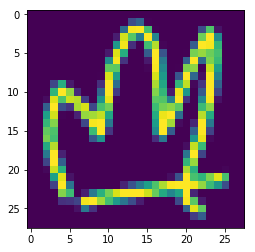

[0.020340776, 0.062639304, 0.084455669, 0.10704049, 0.63762009] ['angel', 'fan', 'fireplace', 'chandelier', 'campfire'] drums


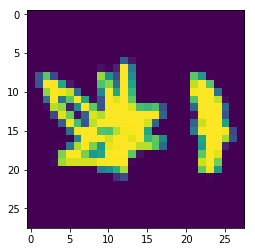

[0.011862428, 0.026149549, 0.069478683, 0.11165649, 0.76221114] ['blueberry', 'cookie', 'face', 'compass', 'clock'] dumbbell


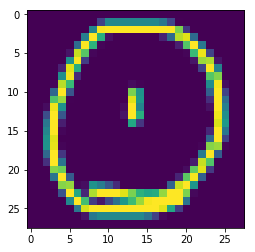

[0.030796291, 0.040944725, 0.052816302, 0.056844588, 0.075535141] ['fireplace', 'crown', 'campfire', 'fence', 'beach'] envelope


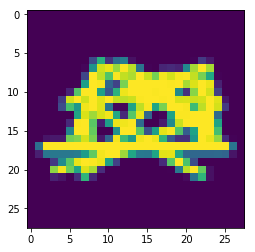

[0.024129672, 0.030815499, 0.091163836, 0.20130403, 0.50378186] ['couch', 'bulldozer', 'basket', 'bee', 'drums'] envelope


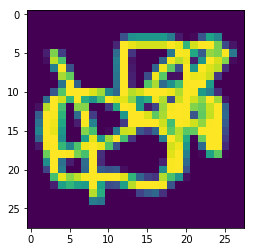

[0.013907825, 0.035837721, 0.042669374, 0.047489103, 0.61284894] ['book', 'eraser', 'bottlecap', 'barn', 'bread'] floor lamp


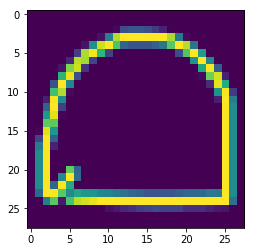

In [9]:
### plot those that are incorrect
for i in range(19,2500,20):
    if np.argmax(y_pred[i]) not in pred2[i] :
        plt.imshow(X_pred[i,:,:,0]);
        print sorted(pred[i])[-5:],map( lambda x : classes[x],pred2[i]),classes[np.argmax(y_pred[i])]
        plt.show();plt.close()

# THE CORRECT ONES

[2.1371889e-05, 0.00071830663, 0.0049141683, 0.010230741, 0.98409754] ['fish', 'crocodile', 'dragon', 'dolphin', 'airplane'] airplane


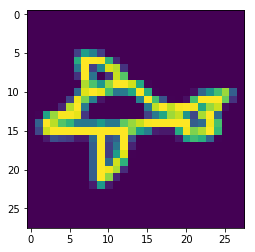

[0.00020890427, 0.00039765597, 0.00091461523, 0.0057601193, 0.99229771] ['dog', 'face', 'bear', 'drums', 'alarm clock'] alarm clock


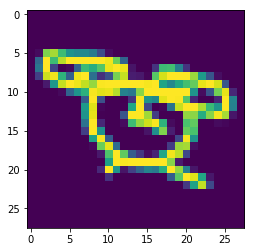

[0.0018313639, 0.0083921347, 0.014763363, 0.015481613, 0.95887911] ['brain', 'car', 'bus', 'bus', 'ambulance'] ambulance


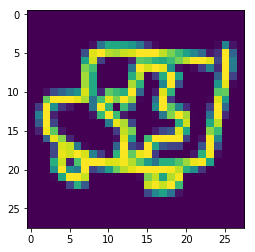

[2.504372e-10, 1.8604535e-09, 1.3841501e-08, 1.675544e-08, 1.0] ['dragon', 'drums', 'fan', 'bear', 'angel'] angel


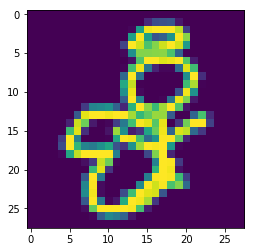

[9.5236576e-14, 5.827964e-13, 6.2641463e-12, 1.9475659e-11, 1.0] ['fan', 'bee', 'butterfly', 'bear', 'angel'] angel


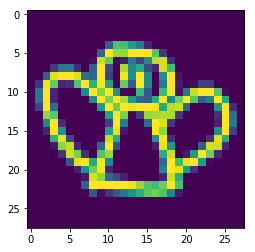

[2.1222935e-10, 2.3384625e-10, 5.7968785e-09, 6.7890111e-09, 1.0] ['dog', 'eyeglasses', 'drums', 'blueberry', 'ant'] ant


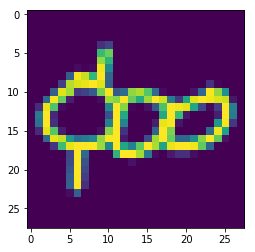

[1.9679388e-11, 4.8834395e-11, 1.2864837e-08, 7.3220626e-08, 0.99999988] ['crocodile', 'bread', 'drill', 'cannon', 'anvil'] anvil


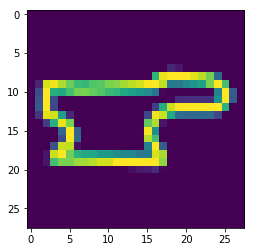

[8.6322131e-14, 1.0565365e-12, 2.6089447e-12, 1.1671575e-08, 1.0] ['cake', 'alarm clock', 'birthday cake', 'blueberry', 'apple'] apple


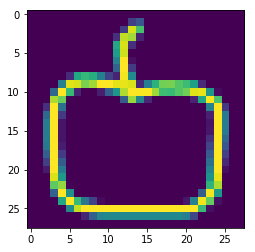

[1.2419436e-17, 1.3945875e-17, 5.0501724e-16, 2.1294652e-15, 1.0] ['eraser', 'crayon', 'drill', 'fork', 'axe'] axe


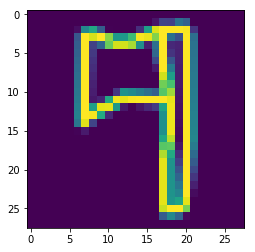

[0.0067882976, 0.0075989082, 0.018770494, 0.087084241, 0.8558296] ['drill', 'bed', 'floor lamp', 'bottlecap', 'axe'] axe


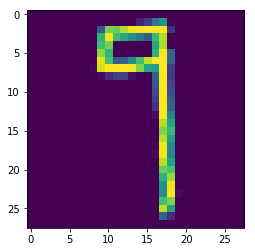

[6.7391366e-06, 0.00010476079, 0.0011196356, 0.2749151, 0.72384459] ['belt', 'boomerang', 'bathtub', 'canoe', 'banana'] banana


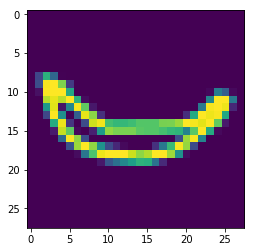

[3.8877592e-06, 0.0018231462, 0.070026748, 0.28752914, 0.64061445] ['bracelet', 'bowtie', 'flashlight', 'bandage', 'belt'] bandage


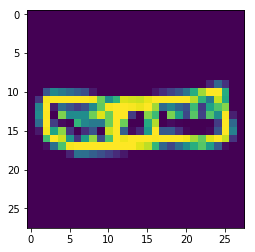

[0.0022333988, 0.0031074099, 0.0038964092, 0.0039524315, 0.97417814] ['fence', 'fireplace', 'belt', 'chandelier', 'barn'] barn


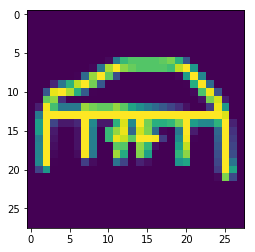

[4.1451363e-05, 9.2062146e-05, 0.026292607, 0.38807532, 0.58542496] ['boomerang', 'cannon', 'fish', 'dolphin', 'baseball bat'] baseball bat


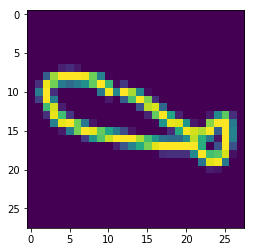

[2.9422409e-08, 6.0975061e-08, 3.6390102e-07, 1.6691496e-06, 0.99999774] ['foot', 'boomerang', 'banana', 'baseball', 'baseball bat'] baseball bat


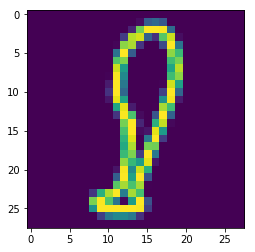

[5.5292928e-13, 6.366993e-13, 6.8575774e-12, 0.0040157707, 0.9959842] ['basket', 'compass', 'brain', 'basketball', 'baseball'] baseball


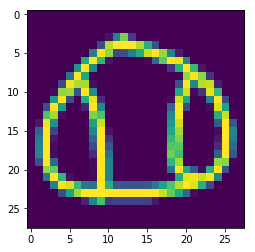

[0.015569401, 0.027920429, 0.046917249, 0.38085678, 0.40179679] ['computer', 'calendar', 'calculator', 'beard', 'basket'] basket


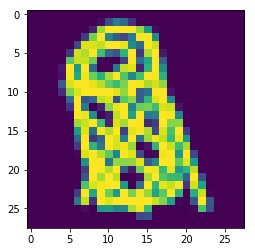

[0.020824684, 0.021218106, 0.17069703, 0.29256436, 0.42197686] ['clock', 'brain', 'fan', 'baseball', 'basketball'] basketball


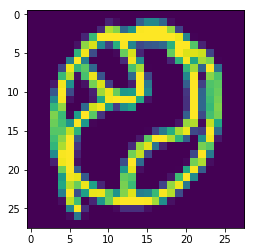

[3.4034099e-05, 3.9435017e-05, 0.00021389971, 0.00027442072, 0.99943405] ['couch', 'birthday cake', 'cake', 'bottlecap', 'bathtub'] bathtub


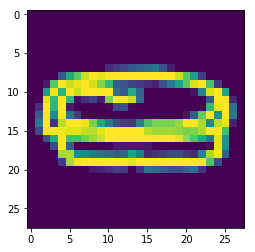

[5.8519691e-09, 7.0357594e-08, 1.7808937e-07, 1.5758484e-06, 0.99999809] ['bed', 'cake', 'birthday cake', 'canoe', 'bathtub'] bathtub


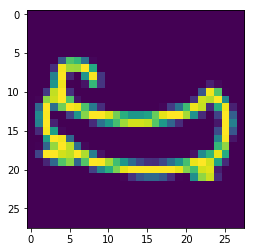

[0.00044961856, 0.00094804843, 0.0016431204, 0.28520238, 0.70782679] ['cannon', 'dragon', 'belt', 'beach', 'crocodile'] beach


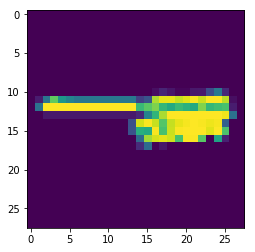

[6.5230634e-09, 2.6192604e-08, 9.7445911e-07, 1.2586504e-06, 0.99999774] ['elephant', 'alarm clock', 'cat', 'dog', 'bear'] bear


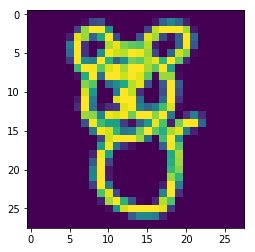

[7.4620154e-08, 1.4611756e-07, 2.20624e-07, 4.2175171e-07, 0.99999917] ['belt', 'bracelet', 'bottlecap', 'basket', 'beard'] beard


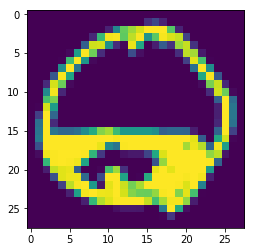

[2.3796994e-05, 0.00020376567, 0.00064648362, 0.00098811346, 0.9979955] ['birthday cake', 'dumbbell', 'drill', 'bathtub', 'bed'] bed


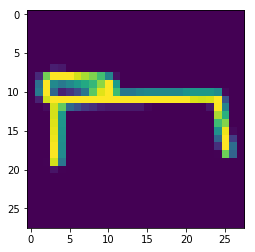

[0.00096872228, 0.0017129214, 0.0031416039, 0.01335181, 0.97953254] ['eraser', 'fence', 'couch', 'bathtub', 'bed'] bed


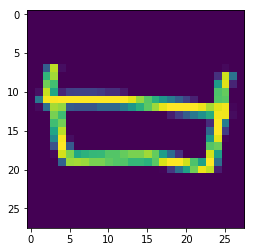

[1.7942509e-10, 1.3727035e-07, 1.3993879e-07, 3.6095527e-05, 0.99996364] ['baseball', 'cello', 'basketball', 'butterfly', 'bee'] bee


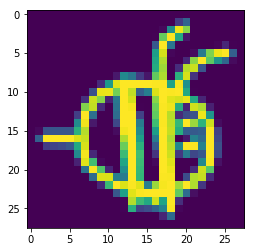

[1.1691667e-06, 2.0473199e-05, 2.5691195e-05, 0.083219439, 0.91673177] ['crayon', 'flashlight', 'eraser', 'belt', 'bandage'] belt


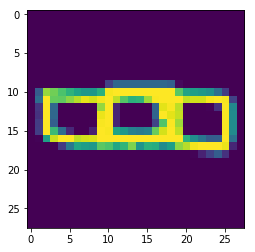

[0.0024060828, 0.0028079194, 0.013582686, 0.038913101, 0.937154] ['firetruck', 'eyeglasses', 'car', 'cannon', 'bicycle'] bicycle


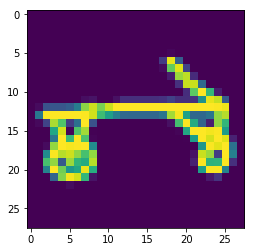

[0.00012428981, 0.00021629756, 0.00029555857, 0.0031653533, 0.99561572] ['axe', 'baseball', 'flip flops', 'dumbbell', 'binoculars'] binoculars


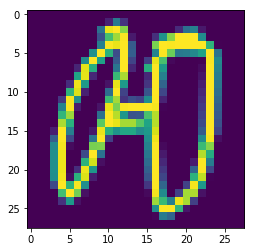

[0.032999467, 0.048597757, 0.084034361, 0.17720377, 0.43405762] ['bread', 'brain', 'eyeglasses', 'bandage', 'binoculars'] binoculars


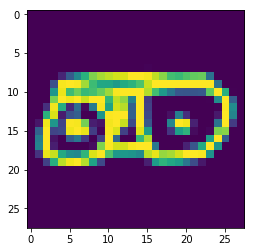

[2.0374976e-08, 8.830623e-08, 5.1860917e-07, 0.479332, 0.52066737] ['couch', 'bathtub', 'chandelier', 'cake', 'birthday cake'] birthday cake


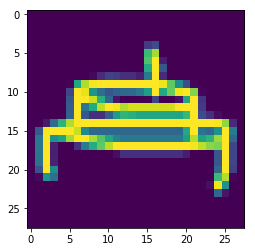

[0.0090966467, 0.014638063, 0.017095624, 0.055893976, 0.89871275] ['alarm clock', 'bear', 'bracelet', 'apple', 'blueberry'] blueberry


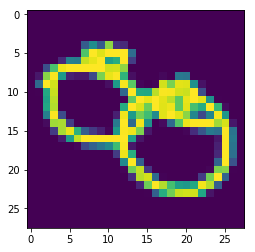

[2.2203107e-08, 5.9341841e-07, 9.2530649e-07, 2.2386878e-06, 0.99999619] ['calendar', 'eraser', 'dresser', 'bowtie', 'book'] book


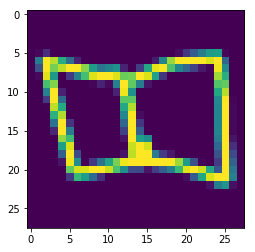

[0.00047144841, 0.00073707663, 0.0014598948, 0.005521263, 0.9914664] ['banana', 'drill', 'crayon', 'boomerang', 'axe'] boomerang


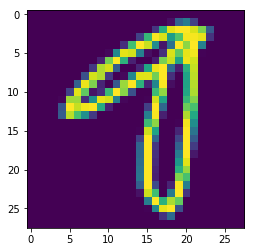

[4.5838641e-07, 0.00013523536, 0.0037849448, 0.032533139, 0.96354598] ['feather', 'elbow', 'ear', 'banana', 'boomerang'] boomerang


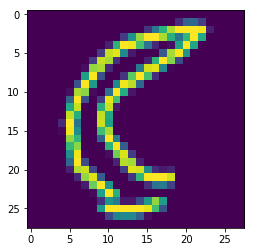

[0.057099663, 0.14572346, 0.15003425, 0.17957228, 0.25363606] ['crayon', 'belt', 'bottlecap', 'eraser', 'bandage'] bottlecap


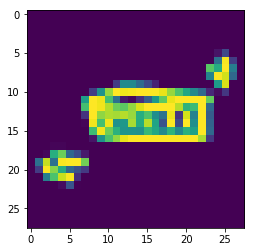

[4.3753437e-17, 1.2411813e-16, 3.3132718e-16, 4.1424502e-07, 0.99999964] ['flashlight', 'binoculars', 'eyeglasses', 'fish', 'bowtie'] bowtie


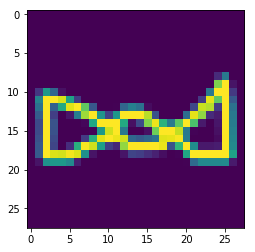

[1.9366027e-09, 6.7266662e-08, 1.5236346e-07, 0.0034103347, 0.99658942] ['coffee cup', 'belt', 'blueberry', 'bottlecap', 'bracelet'] bracelet


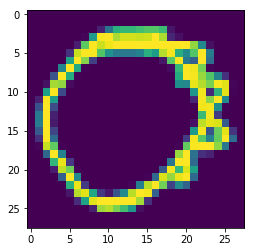

[0.036337499, 0.046561595, 0.17840128, 0.18475407, 0.23805161] ['firetruck', 'couch', 'bus', 'bus', 'brain'] brain


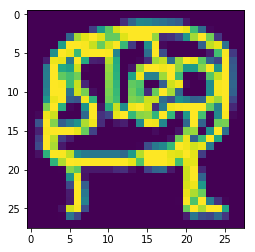

[1.6289123e-06, 1.8082454e-06, 7.5891771e-06, 1.1049879e-05, 0.99997282] ['donut', 'compass', 'fan', 'cookie', 'brain'] brain


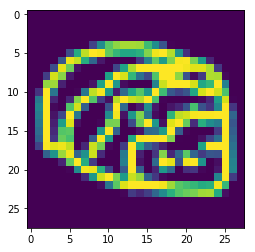

[4.1612364e-14, 4.2132923e-14, 2.722716e-13, 2.3377554e-12, 1.0] ['camel', 'bear', 'cup', 'cloud', 'bread'] bread


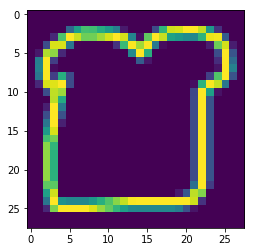

[0.0018363234, 0.019821592, 0.080395825, 0.30431393, 0.59298569] ['finger', 'fork', 'crayon', 'baseball bat', 'broom'] broom


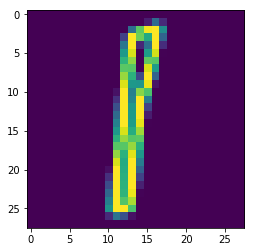

[5.8917929e-05, 7.3386815e-05, 0.0001114238, 0.00027919398, 0.99936742] ['car', 'firetruck', 'elephant', 'ambulance', 'bulldozer'] bulldozer


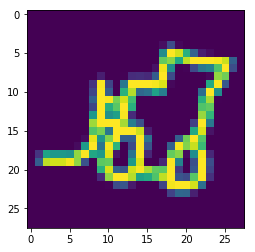

[2.8646475e-05, 0.0067623453, 0.11763439, 0.43602377, 0.4395127] ['car', 'ambulance', 'firetruck', 'bus', 'bus'] bus


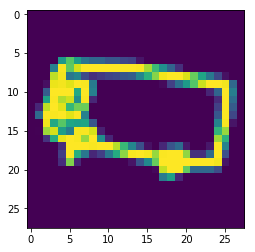

[0.0024138587, 0.0033337404, 0.11422025, 0.43452919, 0.44548202] ['car', 'ambulance', 'firetruck', 'bus', 'bus'] bus


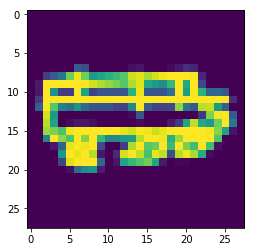

[0.00027106772, 0.00048369938, 0.0016073984, 0.49809417, 0.49953675] ['car', 'ambulance', 'firetruck', 'bus', 'bus'] bus


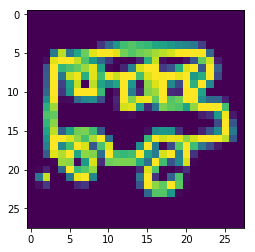

[4.4955903e-16, 5.8849117e-16, 1.6051168e-14, 2.927254e-14, 1.0] ['elephant', 'binoculars', 'bee', 'bowtie', 'butterfly'] butterfly


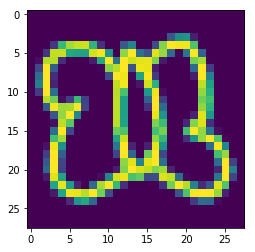

[1.0650883e-21, 2.3430747e-21, 7.4786795e-19, 4.725867e-15, 1.0] ['chandelier', 'fork', 'fire hydrant', 'finger', 'cactus'] cactus


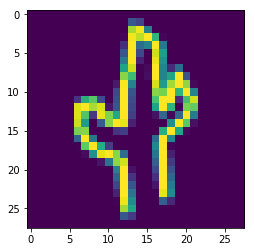

[2.7823566e-13, 1.5795516e-11, 7.0155914e-10, 0.29897806, 0.70102197] ['cup', 'candle', 'coffee cup', 'birthday cake', 'cake'] cake


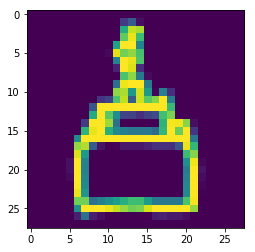

[4.6315186e-17, 2.0227454e-15, 2.2022626e-15, 0.20159887, 0.79840118] ['dresser', 'bathtub', 'coffee cup', 'birthday cake', 'cake'] cake


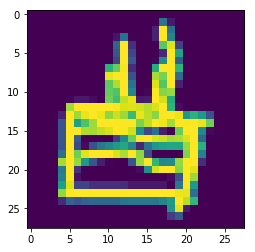

[1.6023405e-05, 5.48307e-05, 6.8301582e-05, 0.20958929, 0.79021454] ['computer', 'dresser', 'book', 'calendar', 'calculator'] calculator


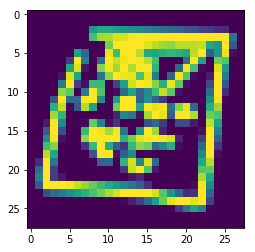

[1.8186714e-05, 6.9356967e-05, 0.00023930814, 0.0020558427, 0.99753821] ['book', 'cake', 'dresser', 'calculator', 'calendar'] calendar


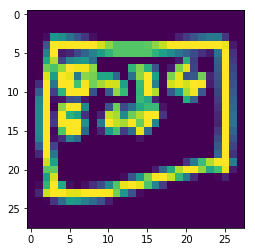

[4.7196195e-08, 7.3196844e-08, 1.79415e-07, 3.0986061e-07, 0.99999928] ['dragon', 'cactus', 'elephant', 'dog', 'camel'] camel


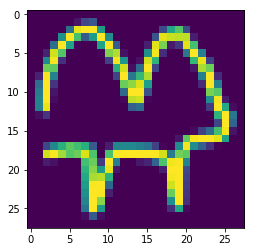

[1.9848928e-17, 1.2798778e-16, 2.1996685e-16, 3.8597602e-15, 1.0] ['birthday cake', 'alarm clock', 'coffee cup', 'ambulance', 'camera'] camera


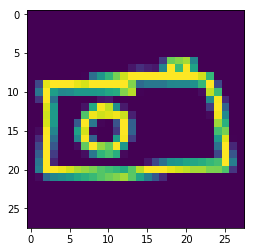

[1.4613655e-06, 1.5337048e-06, 3.1126035e-06, 5.4436609e-06, 0.99998355] ['eraser', 'bandage', 'alarm clock', 'envelope', 'camera'] camera


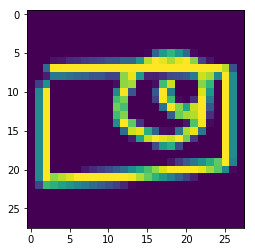

[8.7566425e-20, 2.0437774e-19, 4.6843248e-19, 1.504866e-13, 1.0] ['bottlecap', 'fire hydrant', 'birthday cake', 'crayon', 'candle'] candle


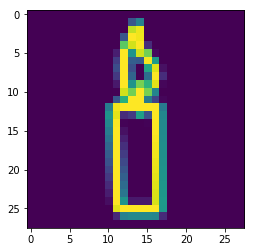

[8.7053104e-06, 1.8142491e-05, 2.9580799e-05, 0.0039040961, 0.99600792] ['bed', 'dog', 'cow', 'firetruck', 'cannon'] cannon


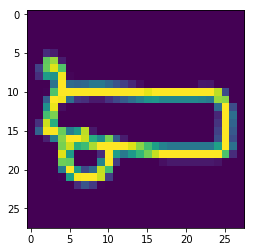

[1.5791884e-05, 3.7470134e-05, 0.028079711, 0.090806514, 0.88098049] ['envelope', 'boomerang', 'banana', 'bathtub', 'canoe'] canoe


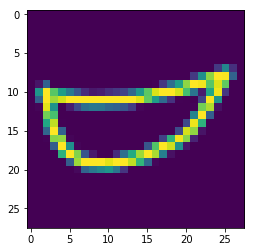

[3.3869008e-09, 5.7470224e-09, 0.00012247438, 0.00014961405, 0.9997279] ['eraser', 'boomerang', 'banana', 'bathtub', 'canoe'] canoe


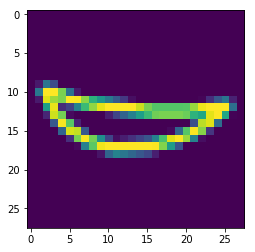

[1.8999528e-07, 1.957077e-07, 1.0194175e-05, 1.1020261e-05, 0.9999783] ['firetruck', 'ambulance', 'bus', 'bus', 'car'] car


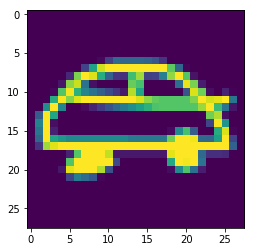

[5.7585561e-11, 1.2676686e-10, 2.8463251e-10, 1.4316496e-08, 1.0] ['fork', 'crayon', 'feather', 'flashlight', 'carrot'] carrot


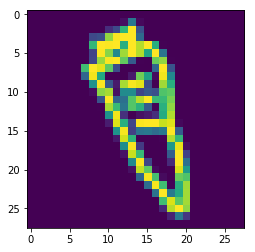

[1.6411537e-15, 1.9470012e-15, 3.1828464e-15, 6.0054988e-14, 1.0] ['fire hydrant', 'broom', 'banana', 'crayon', 'cello'] cello


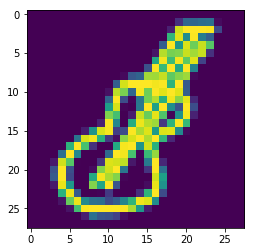

[2.9336817e-09, 3.50124e-09, 1.9221235e-07, 4.0760099e-07, 0.9999994] ['calculator', 'anvil', 'calendar', 'dresser', 'computer'] computer


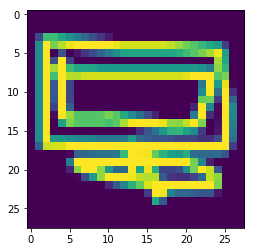

[6.1279252e-07, 1.883452e-06, 4.6667219e-06, 5.8258829e-05, 0.99993253] ['eraser', 'calendar', 'couch', 'basket', 'computer'] computer


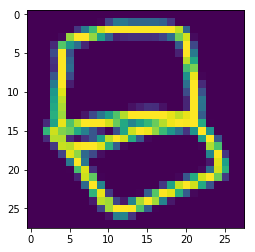

[0.0067992276, 0.0071433964, 0.017287062, 0.18826689, 0.77016401] ['dragon', 'bear', 'crab', 'dog', 'cat'] cat


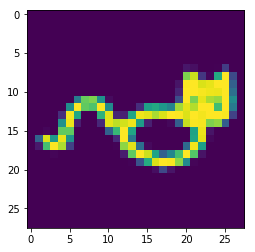

[0.062016983, 0.06818112, 0.070471898, 0.079561204, 0.1063002] ['campfire', 'chandelier', 'blueberry', 'foot', 'broom'] chandelier


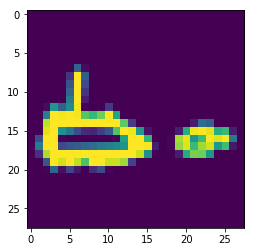

[0.0015188369, 0.012121339, 0.037440471, 0.066403344, 0.87879115] ['baseball', 'donut', 'flying saucer', 'compass', 'clock'] clock


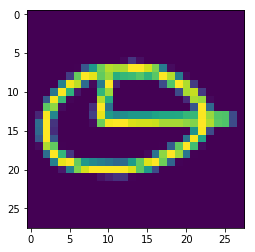

[1.1647766e-05, 4.9238461e-05, 0.00026619789, 0.023810064, 0.97583425] ['car', 'couch', 'bread', 'cloud', 'flying saucer'] cloud


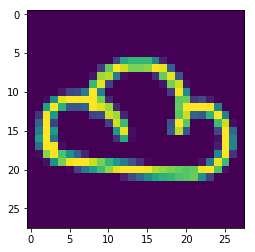

[3.693038e-06, 5.6467336e-05, 9.3459712e-05, 0.00090329815, 0.99893695] ['bottlecap', 'car', 'flying saucer', 'brain', 'cloud'] cloud


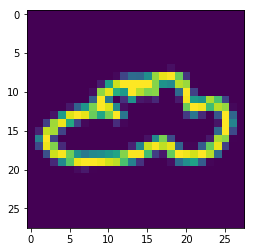

[1.9763226e-10, 6.4618455e-10, 7.0378264e-10, 0.25372049, 0.74627954] ['ambulance', 'drill', 'anvil', 'cup', 'coffee cup'] coffee cup


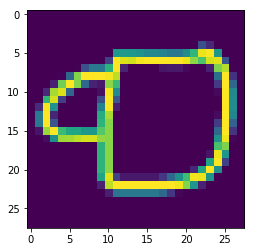

[4.2674804e-07, 7.7866787e-07, 0.0055656964, 0.044254106, 0.95017868] ['alarm clock', 'blueberry', 'donut', 'clock', 'compass'] compass


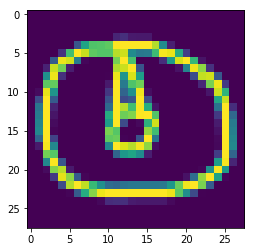

[5.6261214e-11, 5.6057967e-09, 1.5379401e-08, 6.2213638e-07, 0.9999994] ['dog', 'blueberry', 'bear', 'face', 'cookie'] cookie


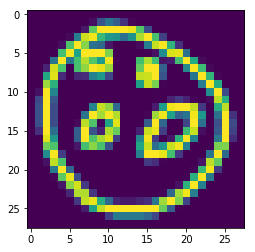

[3.4165892e-06, 3.5990829e-06, 5.9858794e-06, 8.116911e-06, 0.99997377] ['bulldozer', 'birthday cake', 'dresser', 'computer', 'couch'] couch


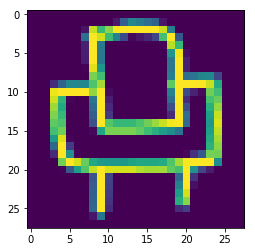

[2.5118727e-06, 4.1500284e-06, 0.026974741, 0.43840924, 0.53460824] ['fence', 'eraser', 'dumbbell', 'bed', 'couch'] couch


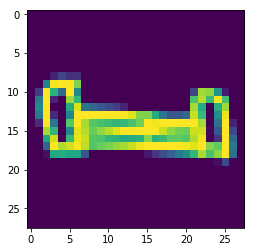

[0.00013012138, 0.00014676755, 0.00063870486, 0.00098081899, 0.99796081] ['elephant', 'crocodile', 'cat', 'dog', 'cow'] cow


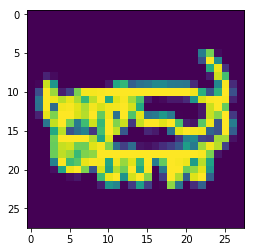

[8.3843589e-18, 1.4829628e-17, 1.1143849e-16, 4.7556001e-14, 1.0] ['bear', 'dog', 'drums', 'cat', 'crab'] crab


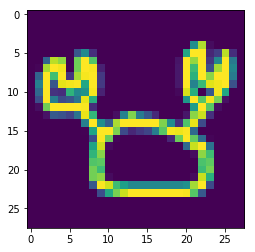

[1.2206564e-07, 8.0823594e-07, 1.6531342e-06, 2.9511252e-06, 0.99999428] ['bandage', 'eraser', 'candle', 'finger', 'crayon'] crayon


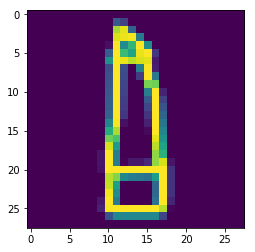

[0.0073338887, 0.058192629, 0.14293212, 0.25498489, 0.53252697] ['fish', 'airplane', 'crocodile', 'dolphin', 'dragon'] crocodile


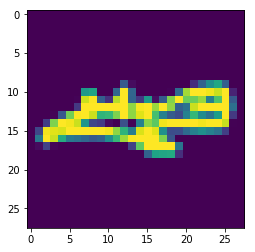

[0.028839339, 0.055435698, 0.19737642, 0.22181956, 0.23061638] ['foot', 'canoe', 'dolphin', 'crocodile', 'baseball bat'] crocodile


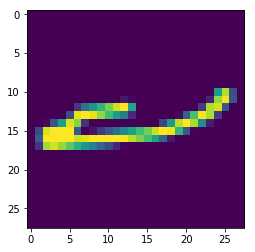

[4.6122234e-10, 5.6464461e-10, 9.8853559e-10, 1.8811634e-09, 1.0] ['fish', 'cake', 'birthday cake', 'envelope', 'crown'] crown


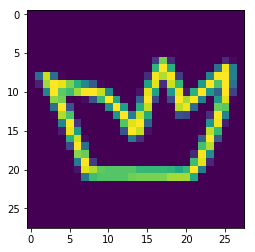

[7.6911937e-07, 8.2451066e-07, 2.1263275e-05, 0.00060370227, 0.99937314] ['drums', 'basket', 'bottlecap', 'coffee cup', 'cup'] cup


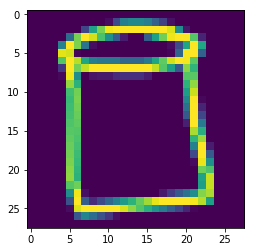

[5.6550169e-05, 6.8599249e-05, 0.00010540527, 0.00059404998, 0.99910945] ['eraser', 'book', 'baseball', 'brain', 'diamond'] diamond


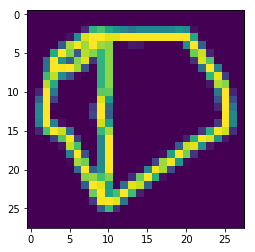

[0.019419227, 0.024375247, 0.070264377, 0.097439729, 0.73726201] ['cat', 'alarm clock', 'dog', 'blueberry', 'bear'] dog


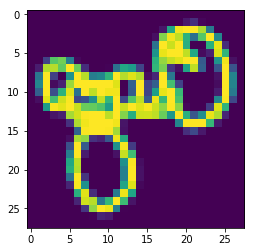

[0.0022699013, 0.025049306, 0.031075994, 0.11587167, 0.82119769] ['dolphin', 'flamingo', 'dog', 'dragon', 'duck'] dog


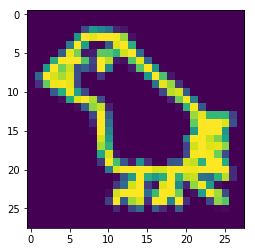

[6.047951e-10, 9.5078323e-10, 3.669361e-09, 9.7341628e-09, 1.0] ['crocodile', 'boomerang', 'fish', 'airplane', 'dolphin'] dolphin


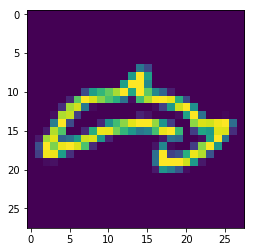

[3.3611648e-06, 3.4317163e-06, 8.1144826e-06, 2.7182876e-05, 0.9999522] ['compass', 'ear', 'bracelet', 'clock', 'donut'] donut


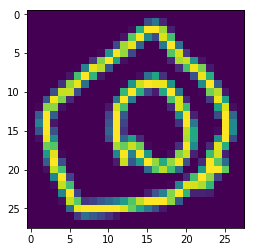

[0.00016905811, 0.00099154329, 0.0012465214, 0.0060109668, 0.99103713] ['duck', 'crocodile', 'airplane', 'angel', 'dragon'] dragon


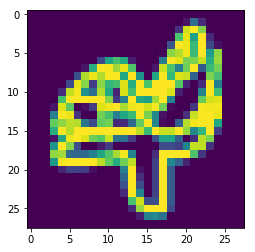

[2.1977509e-09, 2.5915994e-09, 4.2902052e-08, 2.4054043e-07, 0.99999976] ['computer', 'cup', 'calendar', 'book', 'dresser'] dresser


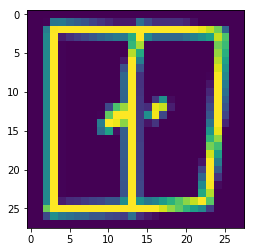

[1.068136e-06, 3.3852059e-06, 3.6860624e-06, 1.5700996e-05, 0.99997354] ['barn', 'binoculars', 'couch', 'calendar', 'dresser'] dresser


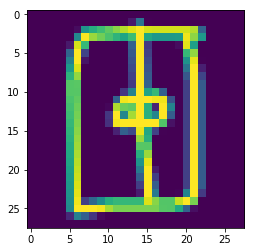

[1.0624186e-06, 1.472032e-06, 2.9433634e-06, 0.12630965, 0.87368447] ['dolphin', 'flamingo', 'dragon', 'drill', 'duck'] drill


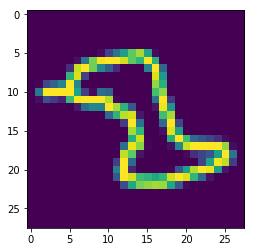

[0.0011650351, 0.0074999453, 0.096181005, 0.17581174, 0.71869129] ['foot', 'banana', 'boomerang', 'elbow', 'duck'] duck


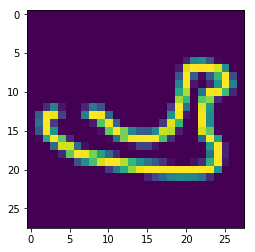

[0.014199255, 0.078610785, 0.09950421, 0.23238358, 0.49955288] ['bulldozer', 'bicycle', 'binoculars', 'eyeglasses', 'dumbbell'] dumbbell


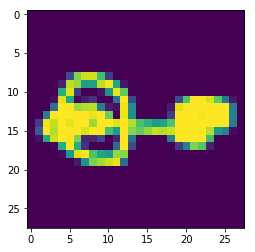

[0.00056729844, 0.00070402352, 0.00078561, 0.00090371515, 0.99510926] ['donut', 'baseball bat', 'flip flops', 'boomerang', 'ear'] ear


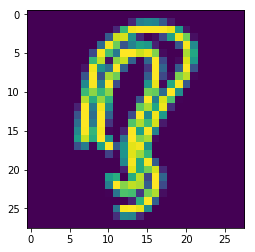

[0.00013817759, 0.0002723787, 0.00071070937, 0.010230805, 0.98855197] ['diamond', 'dolphin', 'foot', 'boomerang', 'elbow'] elbow


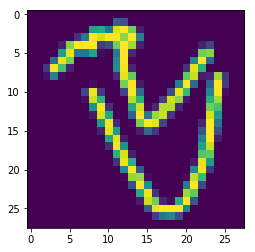

[0.022349361, 0.043327473, 0.043996103, 0.22303401, 0.63151008] ['cow', 'dragon', 'bear', 'dog', 'elephant'] elephant


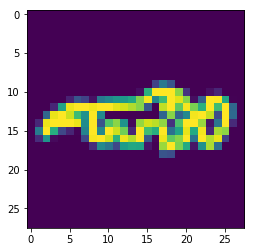

[0.010644503, 0.021111099, 0.034056433, 0.29219225, 0.61472028] ['flying saucer', 'crocodile', 'bread', 'canoe', 'eraser'] eraser


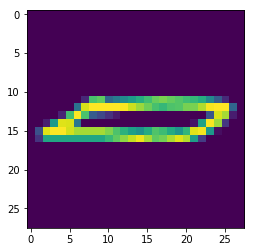

[2.1763897e-08, 8.7854005e-08, 1.0849887e-07, 1.1591885e-07, 0.99999964] ['chandelier', 'blueberry', 'bee', 'crab', 'eye'] eye


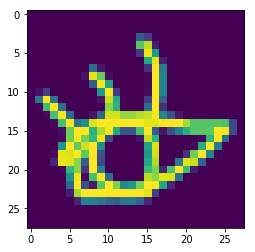

[9.1876622e-09, 3.7040917e-07, 9.6098643e-07, 1.391273e-06, 0.99999726] ['ant', 'bowtie', 'drums', 'binoculars', 'eyeglasses'] eyeglasses


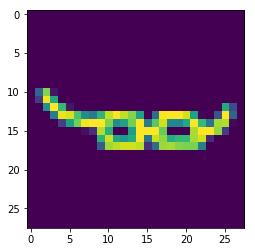

[2.6353229e-11, 1.2006904e-09, 1.9710664e-09, 5.192712e-09, 1.0] ['compass', 'cookie', 'dog', 'beard', 'face'] face


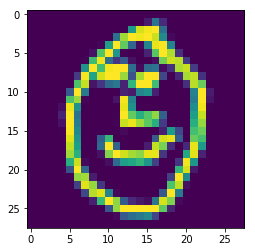

[2.5237512e-07, 1.6343157e-06, 2.5659663e-06, 3.3332493e-05, 0.99996197] ['cookie', 'bear', 'beard', 'dog', 'face'] face


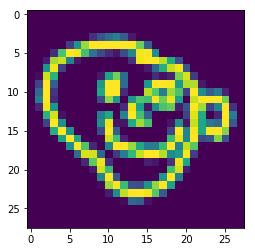

[0.0042788917, 0.0088063562, 0.020564023, 0.031316925, 0.92803502] ['baseball', 'diamond', 'basketball', 'brain', 'fan'] fan


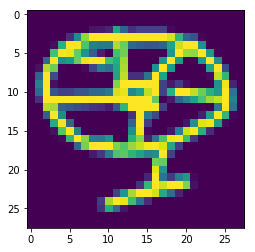

[2.3848106e-08, 3.5563811e-08, 1.3685421e-07, 1.4524281e-06, 0.99999833] ['banana', 'cello', 'flower', 'carrot', 'feather'] feather


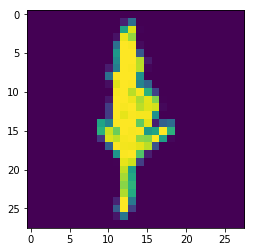

[1.1883355e-06, 2.3114233e-06, 1.7788649e-05, 4.9789309e-05, 0.99992824] ['crayon', 'calendar', 'crown', 'bread', 'fence'] fence


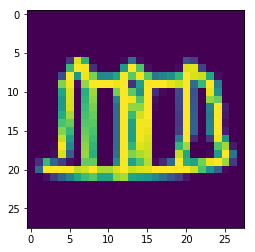

[4.6456843e-09, 7.6559328e-09, 4.1985654e-08, 2.5487068e-06, 0.99999738] ['crayon', 'fire hydrant', 'cactus', 'flip flops', 'finger'] finger


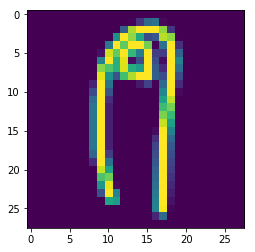

[3.9452639e-06, 4.2606921e-06, 5.8205219e-06, 5.9673348e-05, 0.99992311] ['broom', 'baseball bat', 'feather', 'crayon', 'finger'] finger


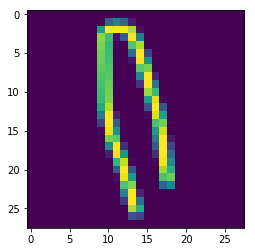

[4.8302714e-13, 7.9418671e-13, 3.2586785e-12, 7.7473991e-12, 1.0] ['bottlecap', 'cup', 'cactus', 'candle', 'fire hydrant'] fire hydrant


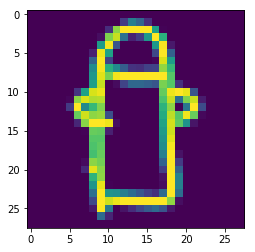

[8.5873389e-06, 0.00015848225, 0.00043162107, 0.0027519059, 0.99663013] ['alarm clock', 'campfire', 'brain', 'barn', 'fireplace'] fireplace


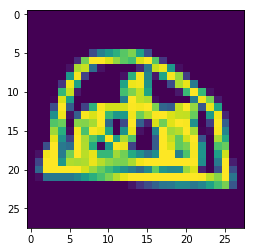

[0.0049929037, 0.034027107, 0.30713838, 0.31306118, 0.34039557] ['car', 'ambulance', 'bus', 'bus', 'firetruck'] firetruck


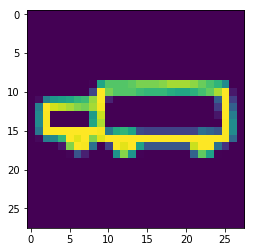

[1.4544476e-14, 4.6694368e-14, 2.69921e-12, 4.4969809e-07, 0.99999952] ['bowtie', 'canoe', 'baseball bat', 'dolphin', 'fish'] fish


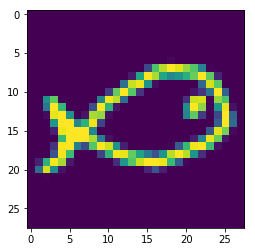

[0.019213112, 0.035588931, 0.14360543, 0.34031382, 0.40627348] ['flashlight', 'crocodile', 'dragon', 'fish', 'bowtie'] fish


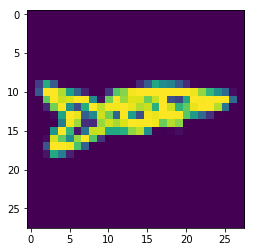

[1.4700854e-12, 5.639782e-11, 8.8469077e-10, 1.8830489e-05, 0.99998116] ['dragon', 'camel', 'dog', 'duck', 'flamingo'] flamingo


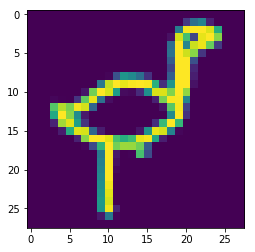

[1.9624785e-10, 3.4000033e-10, 1.6048544e-09, 1.5122595e-07, 0.99999988] ['bandage', 'fire hydrant', 'carrot', 'cannon', 'flashlight'] flashlight


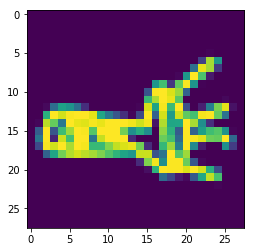

[0.0038700553, 0.0066634677, 0.016128521, 0.025610639, 0.93318564] ['diamond', 'ear', 'bracelet', 'beard', 'flip flops'] flip flops


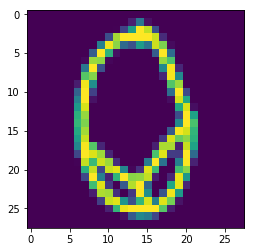

[0.00013401202, 0.00024711946, 0.00024887291, 0.038340114, 0.96084219] ['baseball bat', 'drill', 'fire hydrant', 'floor lamp', 'axe'] floor lamp


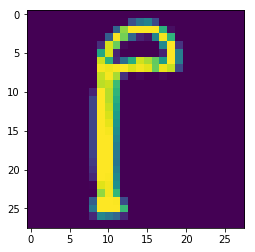

[5.548087e-19, 1.2200049e-18, 5.5489575e-18, 4.108646e-15, 1.0] ['bear', 'blueberry', 'bracelet', 'fan', 'flower'] flower


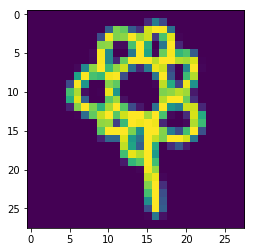

[4.1252955e-05, 4.1343144e-05, 0.00014163276, 0.0071308976, 0.9925465] ['bracelet', 'alarm clock', 'brain', 'bottlecap', 'flying saucer'] flying saucer


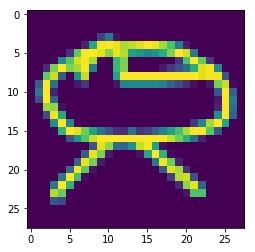

[6.5438121e-07, 1.0521122e-06, 2.0689608e-06, 0.00022750607, 0.99976796] ['coffee cup', 'cup', 'bathtub', 'elbow', 'foot'] foot


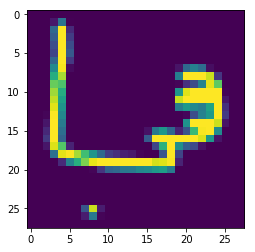

[6.90935e-07, 3.9774011e-05, 7.0558795e-05, 0.00010751034, 0.99978131] ['crayon', 'flashlight', 'candle', 'carrot', 'fork'] fork


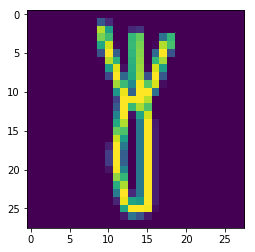

[7.5435507e-09, 3.8959236e-08, 1.1718156e-07, 7.581661e-07, 0.99999905] ['axe', 'flashlight', 'candle', 'carrot', 'fork'] fork


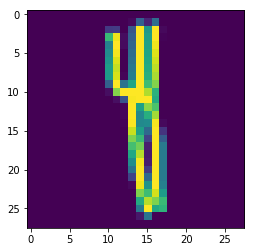

In [10]:
### plot those that are correct
for i in range(19,2500,20):
    if np.argmax(y_pred[i])  in pred2[i] :
        plt.imshow(X_pred[i,:,:,0]);
        print sorted(pred[i])[-5:],map( lambda x : classes[x],pred2[i]),classes[np.argmax(y_pred[i])]
        plt.show();plt.close()

In [11]:
from keras import backend as K #clear memory
K.clear_session()

# INCEPTION3 

In [12]:
from keras.applications.inception_v3 import *

In [13]:
base_model = InceptionV3(weights='imagenet', include_top=False)

In [14]:
base_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, None, None, 32 864         input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, None, None, 32 96          conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, None, None, 32 0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [15]:
mixed4 = base_model.get_layer('mixed2').output
mixed_model = Model(base_model.input,mixed4)

In [16]:
#array1 = np.zeros(shape=(250000,288)) #embeddings for train
array2 = np.zeros(shape=(250000,288)) #embeddings for test
jump = 50000
for i in range(0,250000,jump):
    print i
    #temp = x_train[i:i+jump]
    #temp = np.concatenate([temp,temp,temp],-1)
    #array1[i:i+jump] = np.reshape(mixed_model.predict(temp[:jump],7500),(jump,288))

    temp = x_test[i:i+jump]
    temp = np.concatenate([temp,temp,temp],-1)
    array2[i:i+jump] = np.reshape(mixed_model.predict(temp[:jump],7500),(jump,288))

0
50000
100000
150000
200000


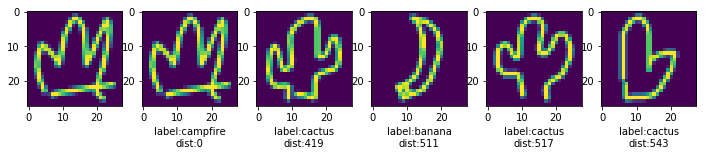

[1.4808933e-10, 3.7193743e-10, 2.7452487e-09, 4.0308348e-09, 1.0] ['cake', 'birthday cake', 'cactus', 'finger', 'crown'] campfire


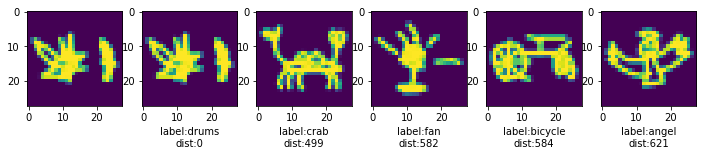

[0.020340776, 0.062639304, 0.084455669, 0.10704049, 0.63762009] ['angel', 'fan', 'fireplace', 'chandelier', 'campfire'] drums


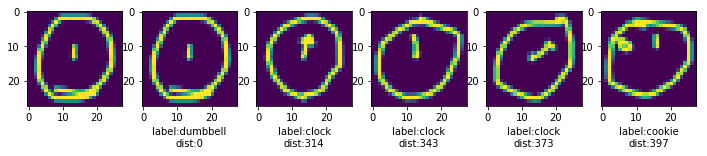

[0.011862428, 0.026149549, 0.069478683, 0.11165649, 0.76221114] ['blueberry', 'cookie', 'face', 'compass', 'clock'] dumbbell


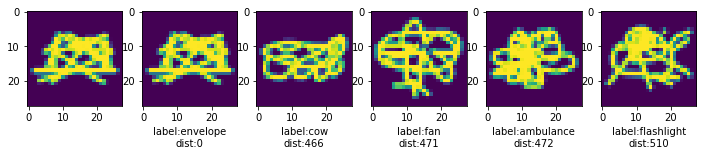

[0.030796291, 0.040944725, 0.052816302, 0.056844588, 0.075535141] ['fireplace', 'crown', 'campfire', 'fence', 'beach'] envelope


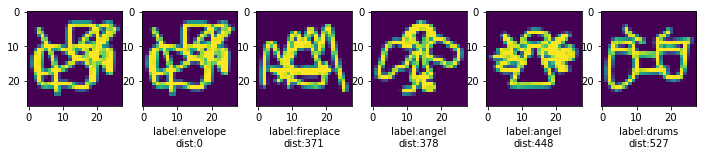

[0.024129672, 0.030815499, 0.091163836, 0.20130403, 0.50378186] ['couch', 'bulldozer', 'basket', 'bee', 'drums'] envelope


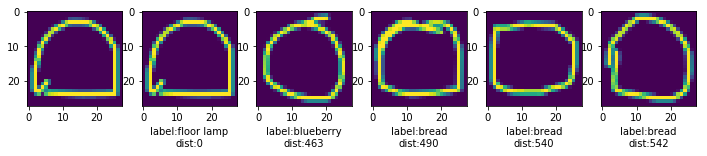

[0.013907825, 0.035837721, 0.042669374, 0.047489103, 0.61284894] ['book', 'eraser', 'bottlecap', 'barn', 'bread'] floor lamp


In [23]:
# lets try for the incorrectly predicted ones and their closest neighbours
for i in range(19,2500,20):
    if np.argmax(y_pred[i]) not in pred2[i] :
        f, ax = plt.subplots(1,6,figsize=(12, 27))
        temp = X_pred[i:i+1];temp = np.concatenate([temp,temp,temp],-1)
        vec = np.reshape(mixed_model.predict(temp[:jump]),(1,288))
        dist = map(lambda x : int(1000*np.mean((x - vec)**2)), array2[:])
        closest_pic = np.argsort(dist)[:5]
        ax[0].imshow(X_pred[i,:,:,0])
        counter = 1
        for j in closest_pic :
            ax[counter].imshow(x_test[j,:,:,0])
            ax[counter].set_xlabel('label:%s\ndist:%s'%(classes[np.argmax(y_test[j])],dist[j]))
            counter += 1
            
        plt.show()
        print sorted(pred[i])[-5:],map( lambda x : classes[x],pred2[i]),classes[np.argmax(y_pred[i])]
        plt.close()

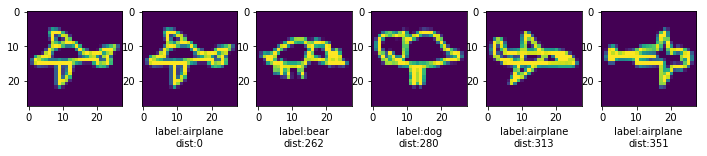

[2.1371889e-05, 0.00071830663, 0.0049141683, 0.010230741, 0.98409754] ['fish', 'crocodile', 'dragon', 'dolphin', 'airplane'] airplane


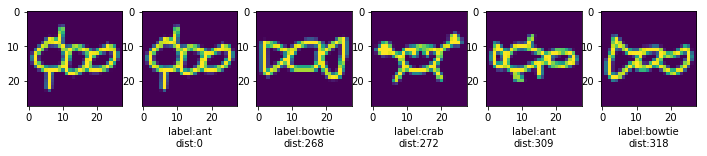

[2.1222935e-10, 2.3384625e-10, 5.7968785e-09, 6.7890111e-09, 1.0] ['dog', 'eyeglasses', 'drums', 'blueberry', 'ant'] ant


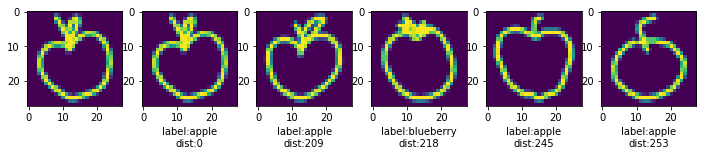

[2.9946685e-20, 9.5268128e-19, 2.5181543e-16, 1.335758e-12, 1.0] ['compass', 'alarm clock', 'butterfly', 'blueberry', 'apple'] apple


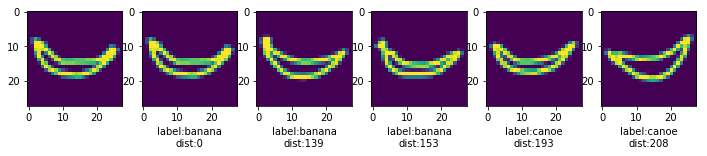

[6.7391366e-06, 0.00010476079, 0.0011196356, 0.2749151, 0.72384459] ['belt', 'boomerang', 'bathtub', 'canoe', 'banana'] banana


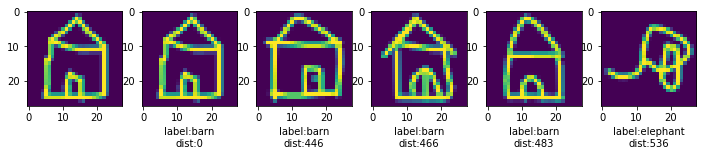

[1.9359526e-21, 3.6140498e-21, 1.449271e-20, 4.5934063e-19, 1.0] ['eraser', 'bread', 'dresser', 'fireplace', 'barn'] barn


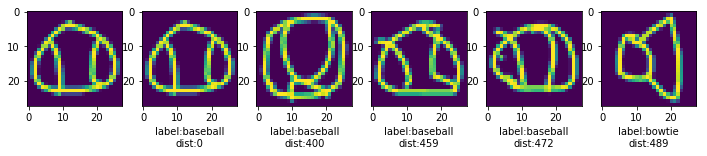

[5.5292928e-13, 6.366993e-13, 6.8575774e-12, 0.0040157707, 0.9959842] ['basket', 'compass', 'brain', 'basketball', 'baseball'] baseball


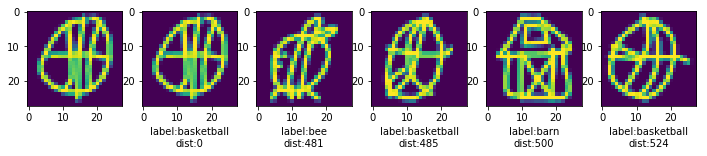

[1.3276912e-09, 6.0738671e-08, 9.5105868e-08, 0.007376208, 0.99262369] ['fan', 'compass', 'basket', 'baseball', 'basketball'] basketball


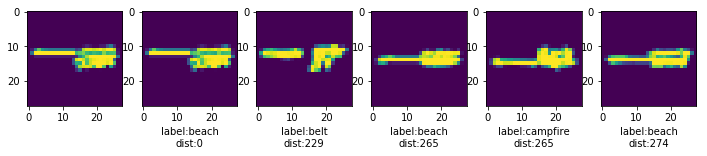

[0.00044961856, 0.00094804843, 0.0016431204, 0.28520238, 0.70782679] ['cannon', 'dragon', 'belt', 'beach', 'crocodile'] beach


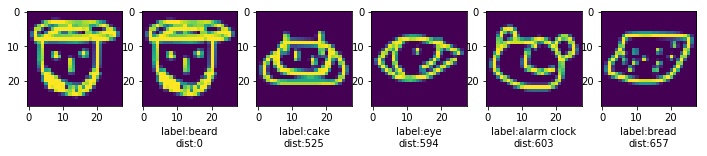

[0.0021271028, 0.0021953757, 0.0059988787, 0.015387652, 0.95744187] ['cup', 'face', 'diamond', 'basket', 'beard'] beard


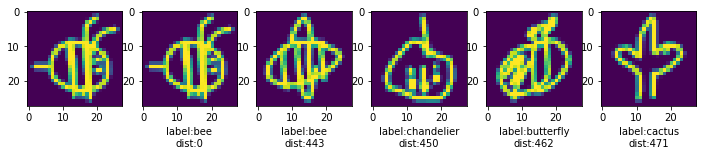

[1.7942509e-10, 1.3727035e-07, 1.3993879e-07, 3.6095527e-05, 0.99996364] ['baseball', 'cello', 'basketball', 'butterfly', 'bee'] bee


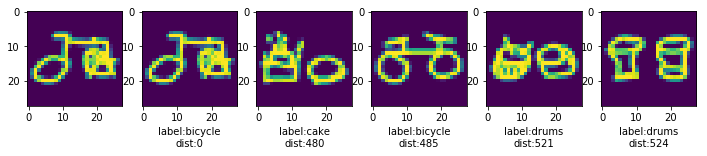

[1.4870697e-08, 8.9587239e-08, 1.3624228e-07, 5.6982736e-07, 0.99999917] ['coffee cup', 'bulldozer', 'binoculars', 'drums', 'bicycle'] bicycle


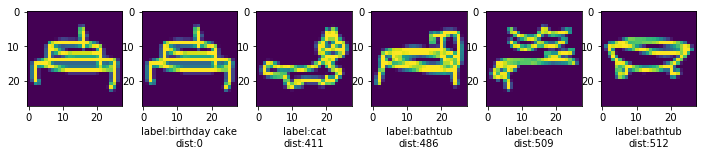

[2.0374976e-08, 8.830623e-08, 5.1860917e-07, 0.479332, 0.52066737] ['couch', 'bathtub', 'chandelier', 'cake', 'birthday cake'] birthday cake


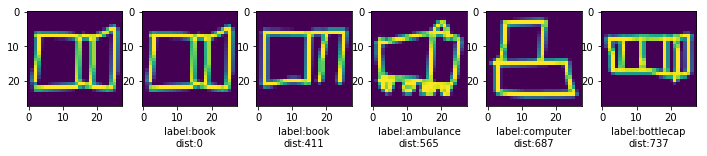

[2.2351922e-05, 2.4316614e-05, 5.749206e-05, 0.00021203716, 0.99964797] ['bowtie', 'fence', 'bread', 'eraser', 'book'] book


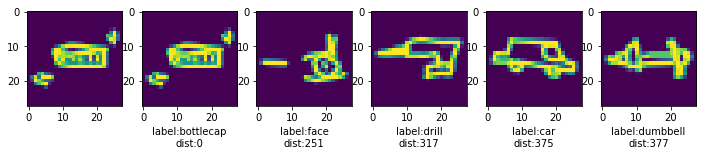

[0.057099663, 0.14572346, 0.15003425, 0.17957228, 0.25363606] ['crayon', 'belt', 'bottlecap', 'eraser', 'bandage'] bottlecap


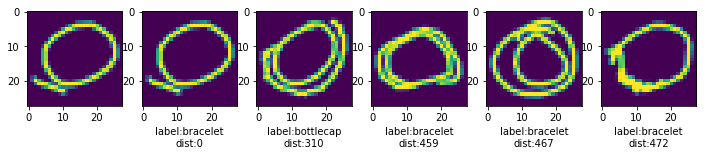

[0.029483104, 0.045509096, 0.047572628, 0.097864486, 0.37280783] ['baseball', 'donut', 'bottlecap', 'blueberry', 'bracelet'] bracelet


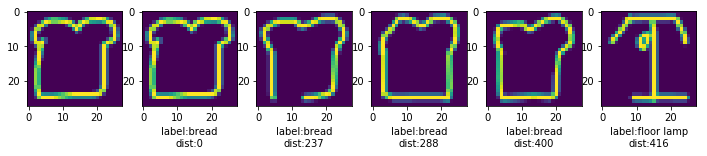

[4.1612364e-14, 4.2132923e-14, 2.722716e-13, 2.3377554e-12, 1.0] ['camel', 'bear', 'cup', 'cloud', 'bread'] bread


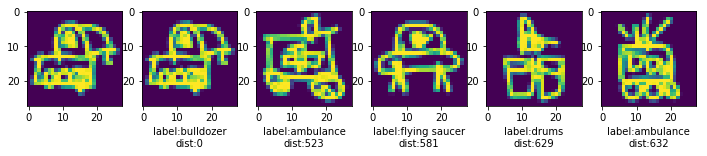

[0.027097657, 0.080021694, 0.15996258, 0.21255316, 0.38586718] ['barn', 'dog', 'bulldozer', 'elephant', 'car'] bulldozer


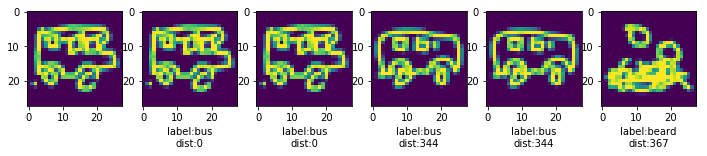

[0.00027106772, 0.00048369938, 0.0016073984, 0.49809417, 0.49953675] ['car', 'ambulance', 'firetruck', 'bus', 'bus'] bus


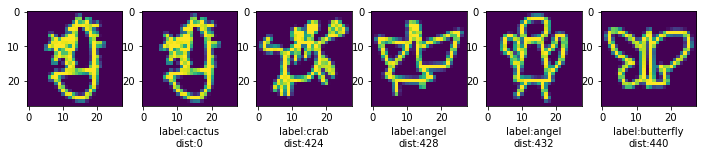

[0.00042340747, 0.00059024285, 0.00082227599, 0.002556778, 0.99160552] ['angel', 'bear', 'dragon', 'fire hydrant', 'cactus'] cactus


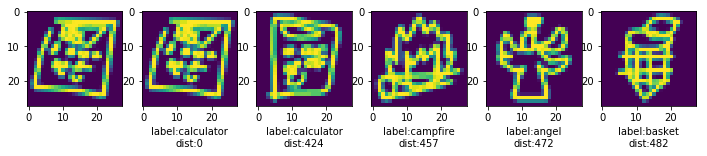

[1.6023405e-05, 5.48307e-05, 6.8301582e-05, 0.20958929, 0.79021454] ['computer', 'dresser', 'book', 'calendar', 'calculator'] calculator


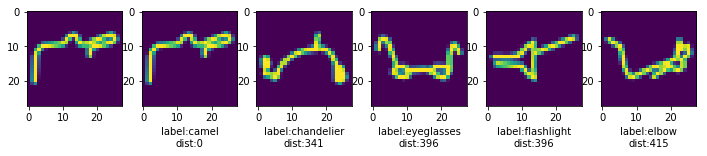

[0.00087152061, 0.0012805966, 0.0017592813, 0.00380153, 0.98591173] ['elephant', 'fence', 'drill', 'bread', 'camel'] camel


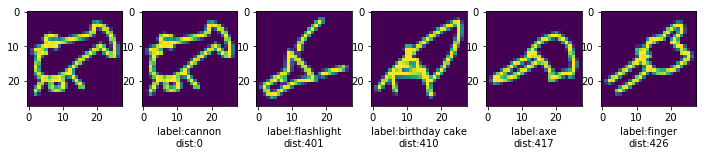

[0.0005507312, 0.0012794287, 0.0034867083, 0.0056225173, 0.98763835] ['dragon', 'cat', 'dog', 'dolphin', 'cannon'] cannon


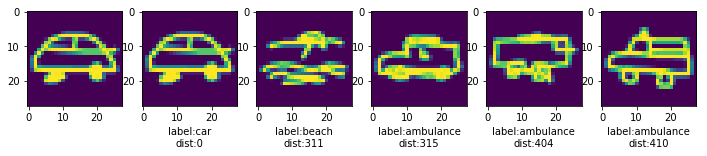

[1.8999528e-07, 1.957077e-07, 1.0194175e-05, 1.1020261e-05, 0.9999783] ['firetruck', 'ambulance', 'bus', 'bus', 'car'] car


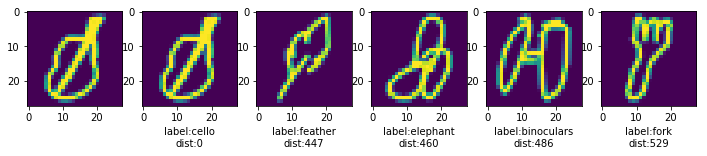

[3.4686437e-10, 5.4954635e-10, 1.4671825e-09, 2.5759004e-08, 1.0] ['compass', 'crayon', 'feather', 'banana', 'cello'] cello


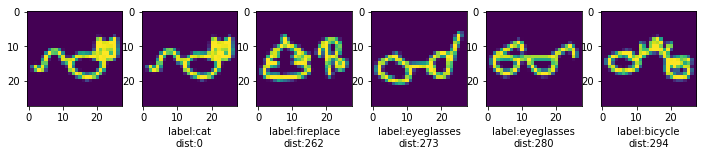

[0.0067992276, 0.0071433964, 0.017287062, 0.18826689, 0.77016401] ['dragon', 'bear', 'crab', 'dog', 'cat'] cat


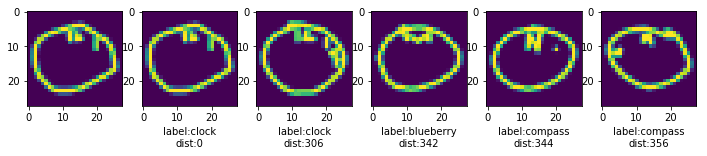

[4.5559403e-08, 4.2165692e-07, 7.2150551e-06, 0.0020056888, 0.99798644] ['baseball', 'cookie', 'blueberry', 'compass', 'clock'] clock


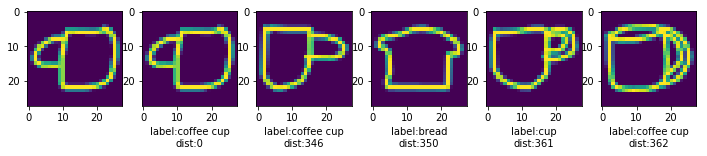

[1.9763226e-10, 6.4618455e-10, 7.0378264e-10, 0.25372049, 0.74627954] ['ambulance', 'drill', 'anvil', 'cup', 'coffee cup'] coffee cup


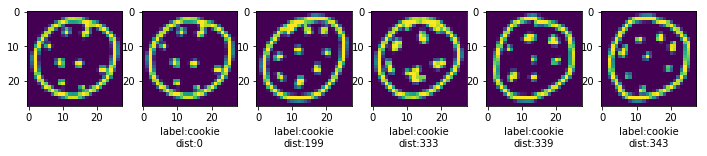

[4.3978243e-08, 7.2019667e-08, 2.4953323e-07, 2.9173741e-06, 0.99999678] ['face', 'blueberry', 'compass', 'clock', 'cookie'] cookie


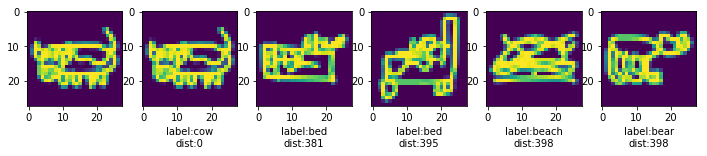

[0.00013012138, 0.00014676755, 0.00063870486, 0.00098081899, 0.99796081] ['elephant', 'crocodile', 'cat', 'dog', 'cow'] cow


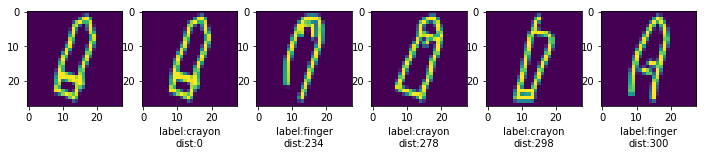

[0.019711955, 0.020510623, 0.081641473, 0.17378686, 0.68639839] ['eraser', 'finger', 'flip flops', 'baseball bat', 'crayon'] crayon


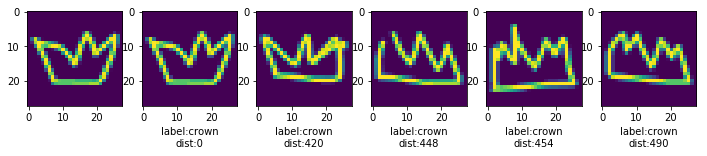

[4.6122234e-10, 5.6464461e-10, 9.8853559e-10, 1.8811634e-09, 1.0] ['fish', 'cake', 'birthday cake', 'envelope', 'crown'] crown


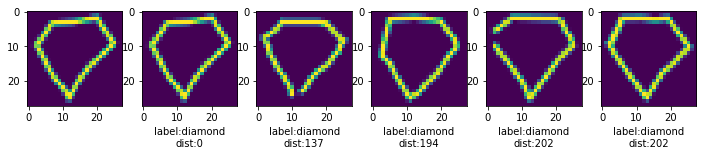

[2.0865068e-14, 4.1288614e-14, 9.4278325e-14, 4.0634407e-13, 1.0] ['basket', 'boomerang', 'beard', 'eraser', 'diamond'] diamond


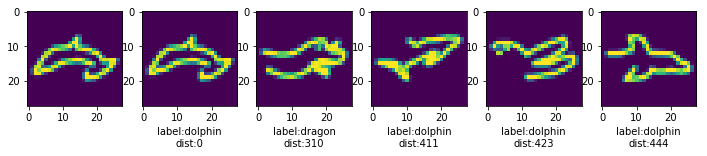

[6.047951e-10, 9.5078323e-10, 3.669361e-09, 9.7341628e-09, 1.0] ['crocodile', 'boomerang', 'fish', 'airplane', 'dolphin'] dolphin


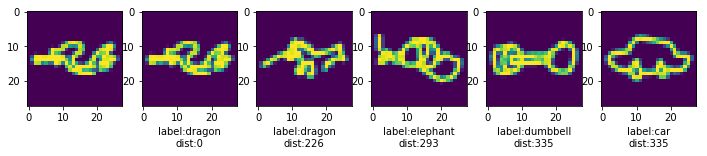

[7.7461673e-06, 2.394394e-05, 0.00014908427, 0.00039787739, 0.99941087] ['drill', 'dolphin', 'elephant', 'duck', 'dragon'] dragon


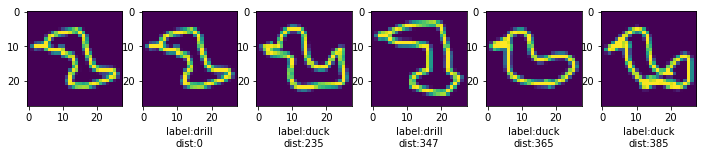

[1.0624186e-06, 1.472032e-06, 2.9433634e-06, 0.12630965, 0.87368447] ['dolphin', 'flamingo', 'dragon', 'drill', 'duck'] drill


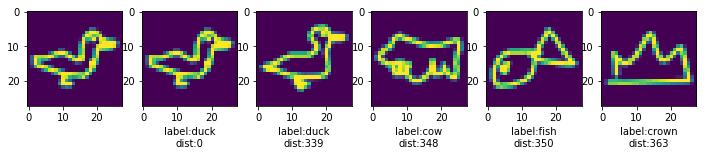

[2.0027926e-13, 4.3060139e-10, 2.6687458e-08, 4.8471912e-07, 0.99999952] ['dolphin', 'dog', 'dragon', 'flamingo', 'duck'] duck


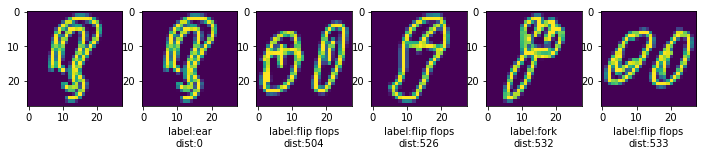

[0.00056729844, 0.00070402352, 0.00078561, 0.00090371515, 0.99510926] ['donut', 'baseball bat', 'flip flops', 'boomerang', 'ear'] ear


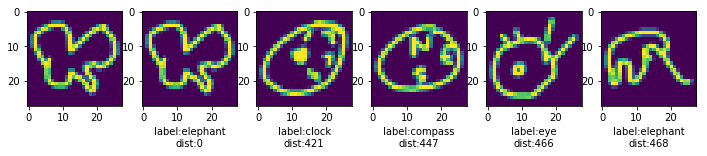

[0.00096170866, 0.0014057757, 0.004391694, 0.015872454, 0.97624582] ['bear', 'elephant', 'apple', 'cloud', 'butterfly'] elephant


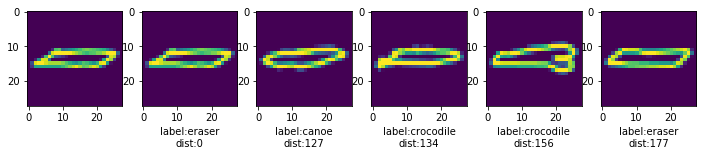

[0.010644503, 0.021111099, 0.034056433, 0.29219225, 0.61472028] ['flying saucer', 'crocodile', 'bread', 'canoe', 'eraser'] eraser


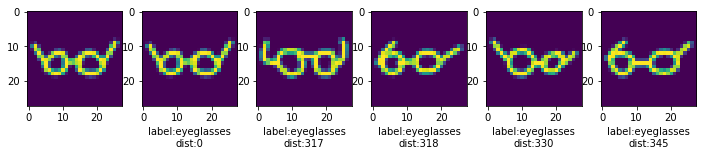

[1.563897e-13, 8.6997879e-13, 2.9032598e-11, 5.3418148e-08, 1.0] ['blueberry', 'drums', 'dumbbell', 'binoculars', 'eyeglasses'] eyeglasses


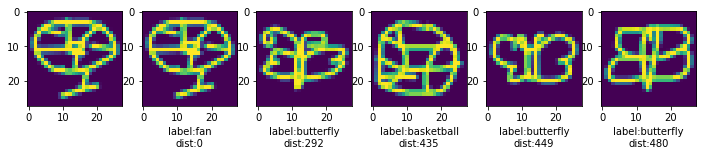

[0.0042788917, 0.0088063562, 0.020564023, 0.031316925, 0.92803502] ['baseball', 'diamond', 'basketball', 'brain', 'fan'] fan


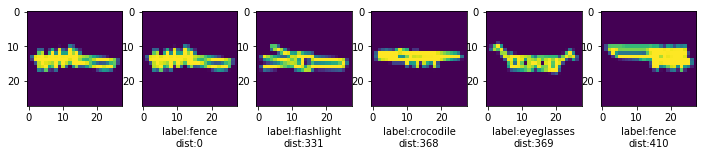

[0.0073227934, 0.011025298, 0.011192761, 0.012926121, 0.90427279] ['finger', 'fire hydrant', 'crayon', 'beach', 'fence'] fence


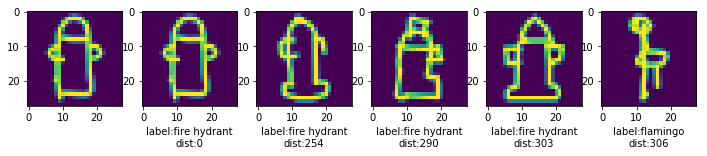

[4.8302714e-13, 7.9418671e-13, 3.2586785e-12, 7.7473991e-12, 1.0] ['bottlecap', 'cup', 'cactus', 'candle', 'fire hydrant'] fire hydrant


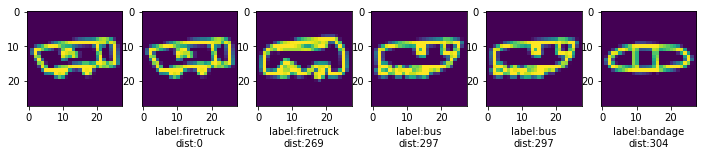

[0.0091348616, 0.16237378, 0.16989239, 0.27099809, 0.38732597] ['car', 'bus', 'bus', 'ambulance', 'firetruck'] firetruck


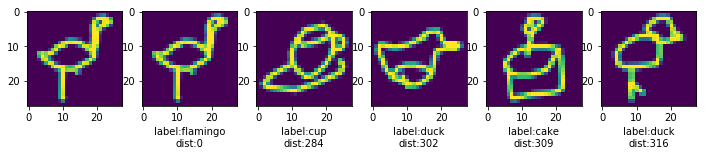

[1.4700854e-12, 5.639782e-11, 8.8469077e-10, 1.8830489e-05, 0.99998116] ['dragon', 'camel', 'dog', 'duck', 'flamingo'] flamingo


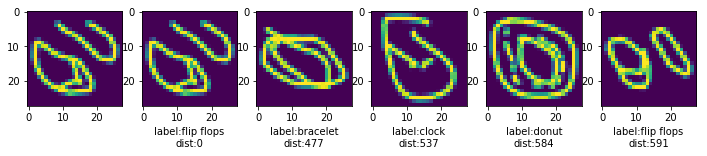

[0.00013099388, 0.0010960266, 0.0013237461, 0.012415234, 0.98492199] ['belt', 'basketball', 'baseball', 'binoculars', 'flip flops'] flip flops


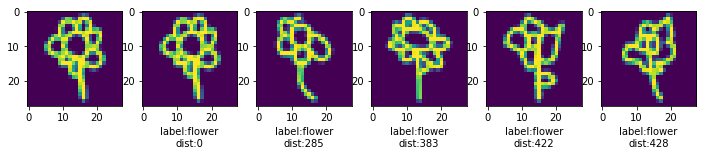

[5.548087e-19, 1.2200049e-18, 5.5489575e-18, 4.108646e-15, 1.0] ['bear', 'blueberry', 'bracelet', 'fan', 'flower'] flower


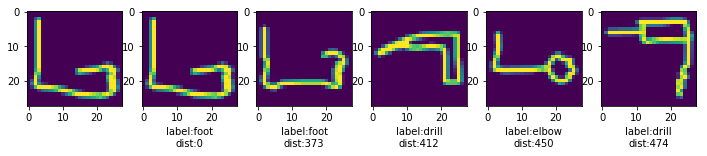

[9.6103896e-08, 1.1203669e-07, 3.3946986e-07, 8.7920635e-05, 0.99991131] ['bread', 'eraser', 'birthday cake', 'elbow', 'foot'] foot


In [24]:
# lets try for the correctly predicted ones and their closest neighbours
for i in range(19,2500,50):
    if np.argmax(y_pred[i])  in pred2[i] :
        f, ax = plt.subplots(1,6,figsize=(12, 27))
        temp = X_pred[i:i+1];temp = np.concatenate([temp,temp,temp],-1)
        vec = np.reshape(mixed_model.predict(temp[:jump]),(1,288))
        dist = map(lambda x : int(1000*np.mean((x - vec)**2)), array2[:])
        closest_pic = np.argsort(dist)[:5]
        ax[0].imshow(X_pred[i,:,:,0])
        counter = 1
        for j in closest_pic :
            ax[counter].imshow(x_test[j,:,:,0])
            ax[counter].set_xlabel('label:%s\ndist:%s'%(classes[np.argmax(y_test[j])],dist[j]))
            counter += 1
            
        plt.show()
        print sorted(pred[i])[-5:],map( lambda x : classes[x],pred2[i]),classes[np.argmax(y_pred[i])]
        plt.close()

 # The mixed2 layer of inception3 seems to be so-so with making features from quickdraw. 